In [2]:
!pip install statsmodels

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [15]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x_transform = ss.transform(x)

In [20]:
type(x_transform)

numpy.ndarray

In [24]:
pd.DataFrame(x_transform,columns=x.columns).describe()

,Age,EstimatedSalary
count,4.000000e+02,4.000000e+02
mean,-2.331468e-16,-1.193490e-17
std,1.001252e+00,1.001252e+00
min,-1.877311e+00,-1.607506e+00
25%,-7.550313e-01,-7.852897e-01
50%,-6.256110e-02,7.561451e-03
75%,7.970571e-01,5.361289e-01
max,2.134241e+00,2.356750e+00


In [25]:
set(y)

{0, 1}

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_transform,y,random_state=2,test_size=0.2)

In [27]:
log=LogisticRegression()
log.fit(x_train,y_train)


LogisticRegression()

In [28]:
y_pred=log.predict(x_test)
y_pred[:5]


array([0, 0, 0, 0, 1], dtype=int64)

In [29]:
y_test[:5]

94     0
32     0
225    0
157    0
356    1
Name: Purchased, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8125

In [32]:
y_proba=log.predict_proba(x_test)
y_proba[:5]


array([[0.93116359, 0.06883641],
       [0.99868527, 0.00131473],
       [0.87273621, 0.12726379],
       [0.94689362, 0.05310638],
       [0.09062931, 0.90937069]])

In [33]:
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8125

In [38]:
y_proba=log.predict_proba(x_test)
y_proba[:5]

array([[0.93116359, 0.06883641],
       [0.99868527, 0.00131473],
       [0.87273621, 0.12726379],
       [0.94689362, 0.05310638],
       [0.09062931, 0.90937069]])

In [41]:
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [ ]:
                                               #DECISION TREE<<<<<<<<<<<<<<

In [51]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

x=cancer.data
y=cancer.target

In [54]:
x=cancer.data
y=cancer.target

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [56]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

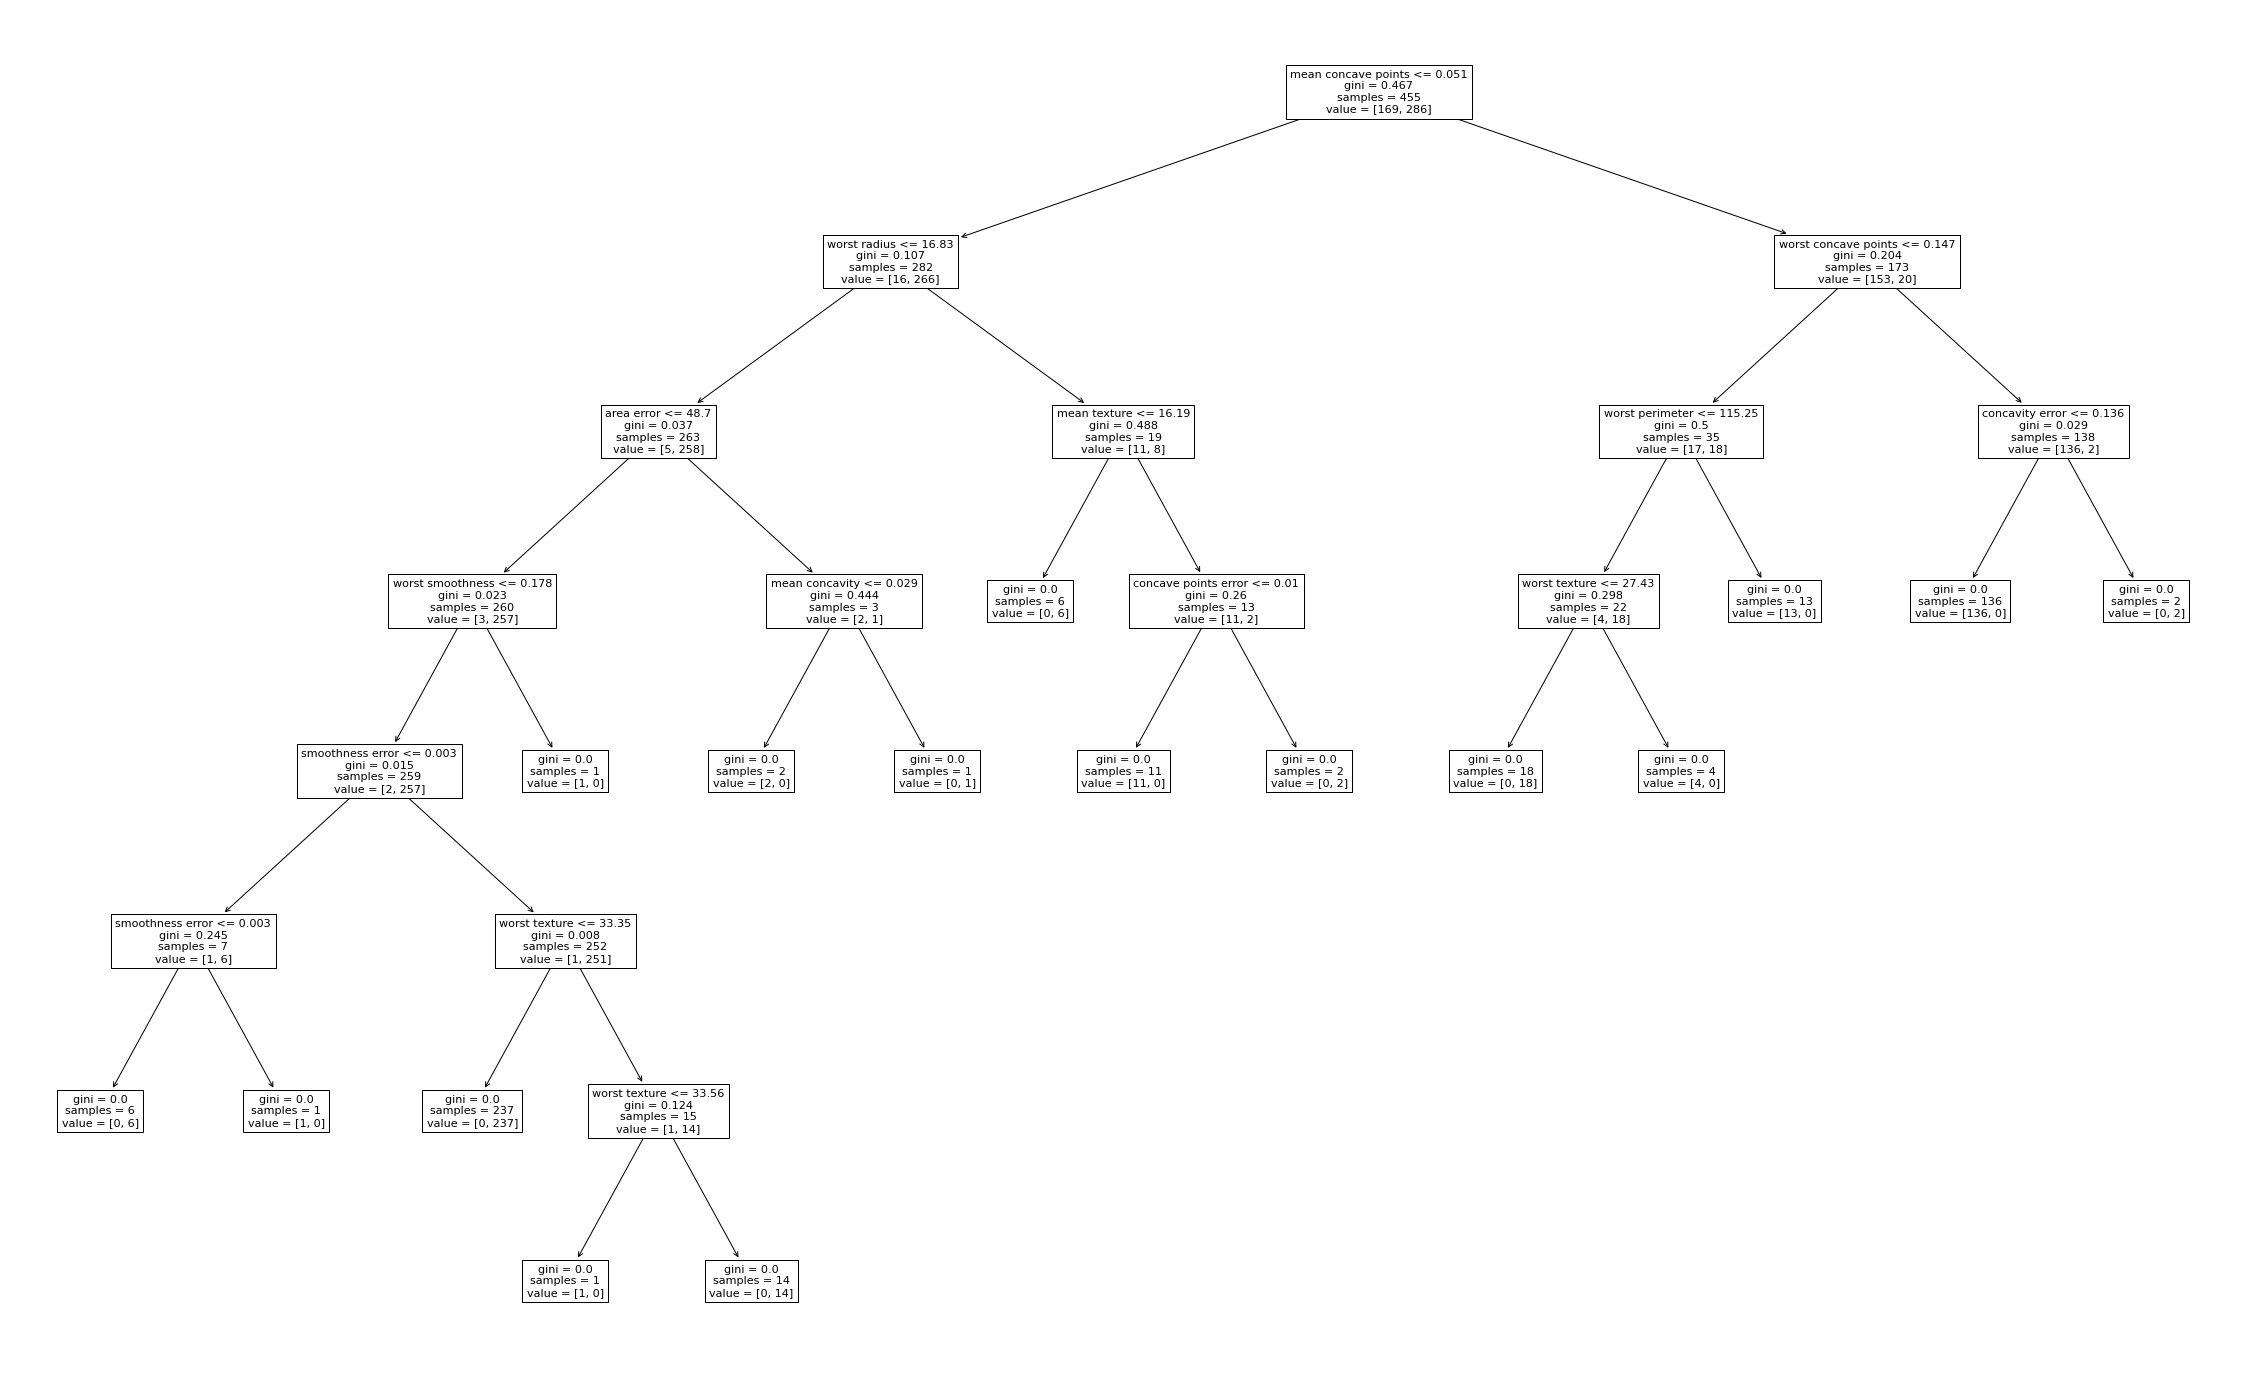

In [61]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(40,25))
plot_tree(tree,feature_names=cancer.feature_names)
plt.show()

In [62]:
tree.get_depth()

7

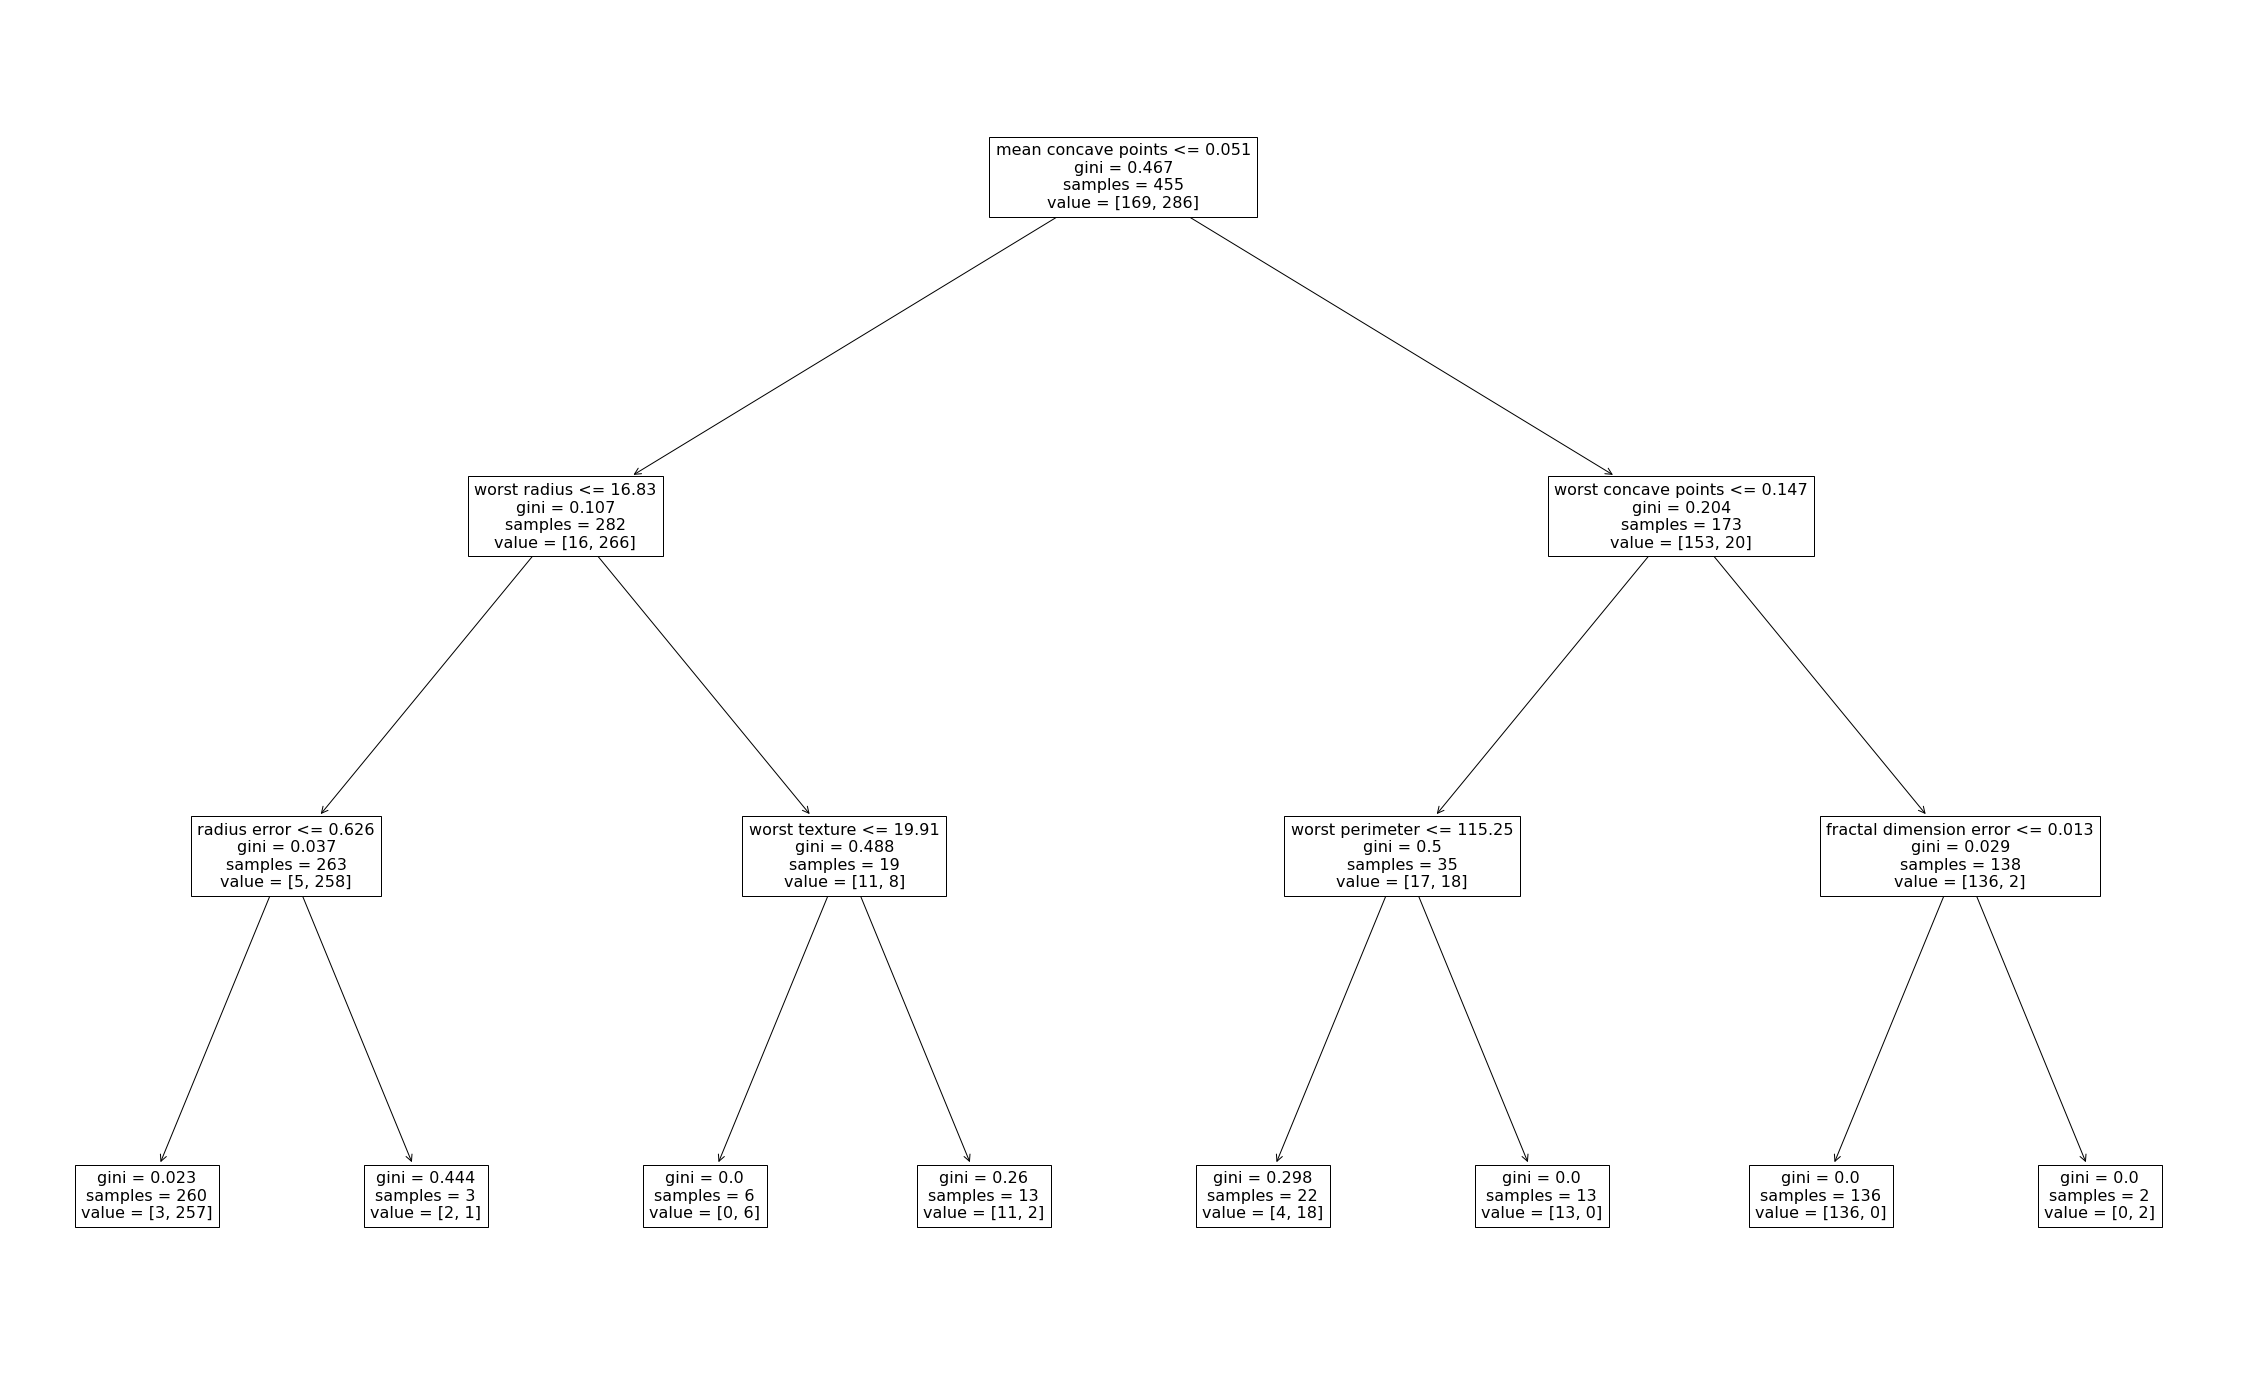

In [66]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=3)
tree.fit(x_train,y_train)
plt.figure(figsize=(40,25))
plot_tree(tree,feature_names=cancer.feature_names)
plt.show()